# Notebook GUI for annotating extracted cells

In [1]:
import config

from config import *

%matplotlib inline

In [30]:
def load_channels(obj):
    global base_xrf_img_dir, all_cells_Cu,all_cells_Zn,all_cells_Ca,all_cells_K,all_cells_P,all_cells_S
    base_xrf_img_dir=os.path.split(fc.selected_path)[0]
    w_bin_elm.disabled=False
    slider.disabled=False
    print(base_xrf_img_dir)
    a_Cu=os.path.join(base_xrf_img_dir,'Cu') + '/*.tif'
    a_Zn=os.path.join(base_xrf_img_dir,'Zn') + '/*.tif'
    a_Ca=os.path.join(base_xrf_img_dir,'Ca') + '/*.tif'
    a_K=os.path.join(base_xrf_img_dir,'K') + '/*.tif'
    a_P=os.path.join(base_xrf_img_dir,'P') + '/*.tif'
    a_S=os.path.join(base_xrf_img_dir,'S') + '/*.tif'

    
#     print(a)
    all_cells_Cu=sorted(glob.glob(a_Cu)) #sort by modification time
    all_cells_Zn=sorted(glob.glob(a_Zn)) #sort by modification time
    all_cells_Ca=sorted(glob.glob(a_Ca)) #sort by modification time
    all_cells_K=sorted(glob.glob(a_K)) #sort by modification time
    all_cells_P=sorted(glob.glob(a_P)) #sort by modification time
    all_cells_S=sorted(glob.glob(a_S)) #sort by modification time
    
#     all_cells_Cu=sorted(glob.glob(a_Cu), key=os.path.getmtime) #sort by modification time
#     all_cells_Zn=sorted(glob.glob(a_Zn), key=os.path.getmtime) #sort by modification time
#     all_cells_Ca=sorted(glob.glob(a_Ca), key=os.path.getmtime) #sort by modification time
#     all_cells_K=sorted(glob.glob(a_K), key=os.path.getmtime) #sort by modification time
#     all_cells_P=sorted(glob.glob(a_P), key=os.path.getmtime) #sort by modification time
#     all_cells_S=sorted(glob.glob(a_S), key=os.path.getmtime) #sort by modification time
    
    print(len(all_cells_Cu))
    
    slider.max=len(all_cells_Cu)-1
    

annot_dir='annotated_XRF'
base__dir_path=os.path.join(os.path.join(os.path.dirname(os.getcwd()),annot_dir), 'raw_cells')
print("Extracted cells will be at: ", base__dir_path)  
print('Please open directory for an xrf image and select any tif file from any channel.')
    
tiff_dir = base__dir_path
default_path = tiff_dir 
fc = FileChooser(default_path)
fc.default_filename = '.tif'
w_bin_elm = widgets.Dropdown(options=['Cu','Zn','Ca', 'K', 'P', 'S'], description='Bin. Elm.:', disabled=True)
btn_fc = widgets.Button(description = "Load Channels")
btn_update = widgets.Button(description = "Update channel")

slider = widgets.IntSlider(min=1, max=100, step=1, continuous_update=True, disabled=True)

global fig, ax
global img1,img2


display(HBox(children = [btn_fc, fc]))
display(HBox(children = [btn_update, w_bin_elm]))
display(HBox(children = [slider]))

# fig, ax = plt.subplots(1,figsize=(3,3))


btn_fc.on_click(load_channels)
btn_update.on_click(load_channels)

Extracted cells will be at:  /data02/AZC/AI_XRF/annotated_XRF/raw_cells
Please open directory for an xrf image and select any tif file from any channel.


/data02/AZC/AI_XRF/annotated_XRF/raw_cells/bnp_fly0050_2018_1
110


In [31]:
arr_Cu=np.array(all_cells_Cu)
arr_Zn=np.array(all_cells_Zn)
arr_Ca=np.array(all_cells_Ca)
arr_K=np.array(all_cells_K)
arr_P=np.array(all_cells_P)
arr_S=np.array(all_cells_S)

In [48]:
%matplotlib inline
fig, ax = plt.subplots(1,6,figsize=(18,3))

all_cells=all_cells_Cu
for idx, cell in enumerate(all_cells):
        #     plt.figure(figsize=(8,8))
        #     plt.close()        
            b_Cu=tiff.imread(arr_Cu[idx])
            b_Zn=tiff.imread(arr_Zn[idx])
            b_Ca=tiff.imread(arr_Ca[idx])
            b_K=tiff.imread(arr_K[idx])
            b_P=tiff.imread(arr_P[idx])
            b_S=tiff.imread(arr_S[idx])
            print(cell)
            #     tiff.imshow(b)
            ax[0].imshow(b_Cu, interpolation='bicubic');
            ax[1].imshow(b_Zn, interpolation='bicubic');
            ax[2].imshow(b_Ca, interpolation='bicubic');
            ax[3].imshow(b_K, interpolation='bicubic');
            ax[4].imshow(b_P, interpolation='bicubic');
            ax[5].imshow(b_S, interpolation='bicubic');
#             ax[0].colorbar()
            ax[0].set_title('Cu')
            ax[1].set_title('Zn')
            ax[2].set_title('Ca')
            ax[3].set_title('K')
            ax[4].set_title('P')
            ax[5].set_title('S')
            ax[0].axis('off');
            ax[1].axis('off');
            ax[2].axis('off');
            ax[3].axis('off');
            ax[4].axis('off');
            ax[5].axis('off');
            
            plt.tight_layout();
            plt.show()
#             plt.axis('off');
            

            
#             plt.colorbar(plt.imshow(b, interpolation='bicubic'), location='bottom', orientation='horizontal')
            
#             plt.savefig('Patches/'+ str(idx) +'.jpg', dpi=300)
            
            choice=input()
            if choice=='n':
                
                reject_path='/data02/AZC/annotated_XRF/reject/'
                patch_filename=reject_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
            
            if choice=='y':
                
                accept_path='/data02/AZC/annotated_XRF/accept/'
                patch_filename=accept_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
            
            clear_output(wait=True)
            plt.close()
        
        
            

/data02/AZC/AI_XRF/annotated_XRF/raw_cells/bnp_fly0050_2018_1/Cu/bnp_fly0050_2018_1__DEC_Cu_Erosion-Dilation_BEC_Cu_5.tif


<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: Interrupted by user

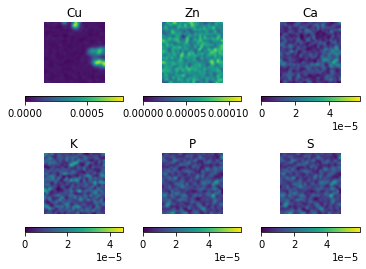

Enter q to quit.
Enter y to accept cell as live.
Enter n to reject cell as dead.
Press Enter to view next cell.


KeyboardInterrupt: Interrupted by user

<Figure size 432x288 with 0 Axes>

In [53]:
%matplotlib inline


all_cells=all_cells_Cu
for idx, cell in enumerate(all_cells):
        #     plt.figure(figsize=(8,8))
        #     plt.close()        
            b_Cu=tiff.imread(arr_Cu[idx])
            b_Zn=tiff.imread(arr_Zn[idx])
            b_Ca=tiff.imread(arr_Ca[idx])
            b_K=tiff.imread(arr_K[idx])
            b_P=tiff.imread(arr_P[idx])
            b_S=tiff.imread(arr_S[idx])
#             print(arr_Cu[idx])
#             print(arr_Zn[idx])
#             print(arr_Ca[idx])
#             print(arr_K[idx])
#             print(arr_P[idx])
#             print(arr_S[idx])
            #     tiff.imshow(b)
#             ax[0].imshow(b_Cu, interpolation='bicubic');
#             ax[1].imshow(b_Zn, interpolation='bicubic');
#             ax[2].imshow(b_Ca, interpolation='bicubic');
#             ax[3].imshow(b_K, interpolation='bicubic');
#             ax[4].imshow(b_P, interpolation='bicubic');
#             ax[5].imshow(b_S, interpolation='bicubic');
#             plt.Figure(figsize=(10, 5), dpi=70)

            plt.subplot(2, 3, 1);
            plt.imshow(b_Cu, interpolation='bicubic');
            plt.axis('off');
            plt.title('Cu');
            plt.colorbar(orientation='horizontal');

            plt.subplot(2, 3, 2);
            plt.imshow(b_Zn, interpolation='bicubic');
            plt.axis('off');
            plt.title('Zn');
            plt.colorbar(orientation='horizontal');

            plt.subplot(2, 3, 3);
            plt.imshow(b_Ca, interpolation='bicubic');
            plt.axis('off');
            plt.title('Ca');
            plt.colorbar(orientation='horizontal');

            plt.subplot(2, 3, 4);
            plt.imshow(b_K, interpolation='bicubic');
            plt.axis('off');
            plt.title('K');
            plt.colorbar(orientation='horizontal');
            
            plt.subplot(2, 3, 5);
            plt.imshow(b_P, interpolation='bicubic');
            plt.axis('off');
            plt.title('P');
            plt.colorbar(orientation='horizontal');
            
            plt.subplot(2, 3, 6);
            plt.imshow(b_S, interpolation='bicubic');
            plt.axis('off');
            plt.title('S');
            plt.colorbar(orientation='horizontal');
            
            plt.subplots_adjust(hspace = 0.5)

            plt.show()
#             ax[0].colorbar()

#             ax[0].set_title('Cu')
#             ax[1].set_title('Zn')
#             ax[2].set_title('Ca')
#             ax[3].set_title('K')
#             ax[4].set_title('P')
#             ax[5].set_title('S')
            
            plt.tight_layout();
#             plt.axis('off');
            

            
#             plt.colorbar(plt.imshow(b, interpolation='bicubic'), location='bottom', orientation='horizontal')
            
#             plt.savefig('Patches/'+ str(idx) +'.jpg', dpi=300)
            print('Enter q to quit.')
            print('Enter y to accept cell as live.')
            print('Enter n to reject cell as dead.')
            print('Press Enter to view next cell.')
            choice=input()
            if choice=='n':
                
                reject_path='/data02/AZC/annotated_XRF/reject/'
                patch_filename=reject_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
            
            if choice=='y':
                
                accept_path='/data02/AZC/annotated_XRF/accept/'
                patch_filename=accept_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
            
            if choice=='q':
                break
            
            clear_output(wait=True)

        
        
            

In [117]:


%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
global slider_tool
btn_accept = widgets.Button(description = "Accept", disabled=False)
btn_reject = widgets.Button(description = "Reject", disabled=False)
display(HBox(children = [btn_accept, btn_reject]))

#patchslider in this definition is an int object not a widget so no need to use .value

# def accept(slider_tool):
#     accept_path='/data02/AZC/annotated_XRF/accept/'
#     patch_filename=accept_path+os.path.split(all_cells[slider_tool])[1]
#     print(patch_filename)
#     tiff.imsave(patch_filename,tiff.imread(all_cells[slider_tool]));
    
# def reject(slider_tool):
#     reject_path='/data02/AZC/annotated_XRF/reject/'
#     patch_filename=reject_path+os.path.split(all_cells[slider_tool])[1]
#     print(patch_filename)
#     tiff.imsave(patch_filename, tiff.imread(all_cells[slider_tool]));


def accept(obj):
    accept_path='/data02/AZC/annotated_XRF/accept/'
    patch_filename=accept_path+os.path.split(all_cells[slider_tool])[1]
    print(patch_filename)
    tiff.imsave(patch_filename, b);
    
def reject(obj):
    reject_path='/data02/AZC/annotated_XRF/reject/'
    patch_filename=reject_path+os.path.split(all_cells[slider_tool])[1]
    print(patch_filename)
    tiff.imsave(patch_filename, b);


def update(slider_tool):
    b=tiff.imread(all_cells[slider_tool])
    print(all_cells[slider_tool])
#     tiff.imshow(b)
    plt.imshow(b, interpolation='bicubic');
    plt.show();
    plt.axis('off');
    btn_accept.on_click(accept,'value')
    btn_reject.on_click(reject, 'value')
    
    reject_path='/data02/AZC/annotated_XRF/reject/'
    patch_filename=reject_path+os.path.split(all_cells[slider_tool])[1]
    print(patch_filename)
    tiff.imsave(patch_filename, b);

#     print(slider_tool)
    
    

    plt.tight_layout()


interact(update,slider_tool=widgets.IntSlider(min=0, max=len(all_cells)-1, step=1, value=0));




interactive(children=(IntSlider(value=0, description='slider_tool', max=142), Output()), _dom_classes=('widget…

KeyboardInterrupt: Interrupted by user

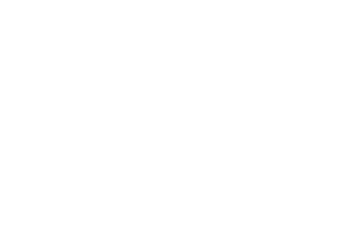

In [125]:
for idx, cell in enumerate(all_cells):
        #     plt.figure(figsize=(8,8))
        #     plt.close()        
            b=tiff.imread(cell)
            print(cell)
            #     tiff.imshow(b)
            plt.imshow(b, interpolation='bicubic');
            plt.show();
            plt.axis('off');
            

            
#             plt.colorbar(plt.imshow(b, interpolation='bicubic'), location='bottom', orientation='horizontal')
            
#             plt.savefig('Patches/'+ str(idx) +'.jpg', dpi=300)
            clear_output(wait=True)
            choice=input()
            if choice=='n':
                
                reject_path='/data02/AZC/annotated_XRF/reject/'
                patch_filename=reject_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
            
            if choice=='y':
                
                accept_path='/data02/AZC/annotated_XRF/accept/'
                patch_filename=accept_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
        
        
            

In [98]:
os.path.split(all_cells[0])[1]

'bnp_fly0001_2018_1_Erosion-Dilation_Cu_0.tif'

<IPython.core.display.Javascript object>


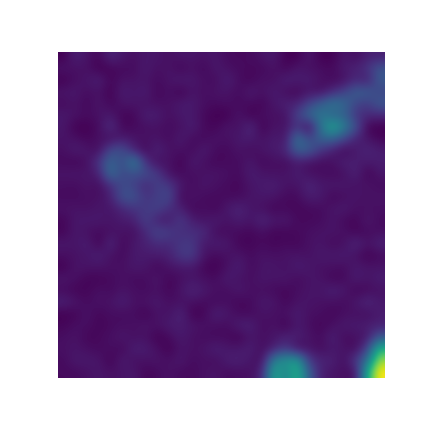

In [21]:
%matplotlib notebook

def on_value_change(change):
    b=tiff.imread(all_cells[0])
#     tiff.imshow(b)
    ax_cell.imshow(b_Cu, interpolation='bicubic');
    plt.show();
    plt.axis('off');

slider = widgets.IntSlider(min=1, max=len(all_cells)-1, step=1, continuous_update=True)


slider.observe(on_value_change, 'value')


fig_cell, ax_cell = plt.subplots(1,figsize=(3,3))
widgets.VBox([slider])


